# Trending YouTube Video Statistics数据集分析

https://github.com/Catherine134/DataAnalysis_Task

## 1.数据摘要和可视化

### 1.1数据摘要

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

#读取数据集
CA = pd.read_csv("DA_input/youtube-new/CAvideos.csv")
pd.set_option('max_rows', 50)

#显示所有列的属性类型
CA.dtypes 

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

读取全部列进行属性分析，如下图：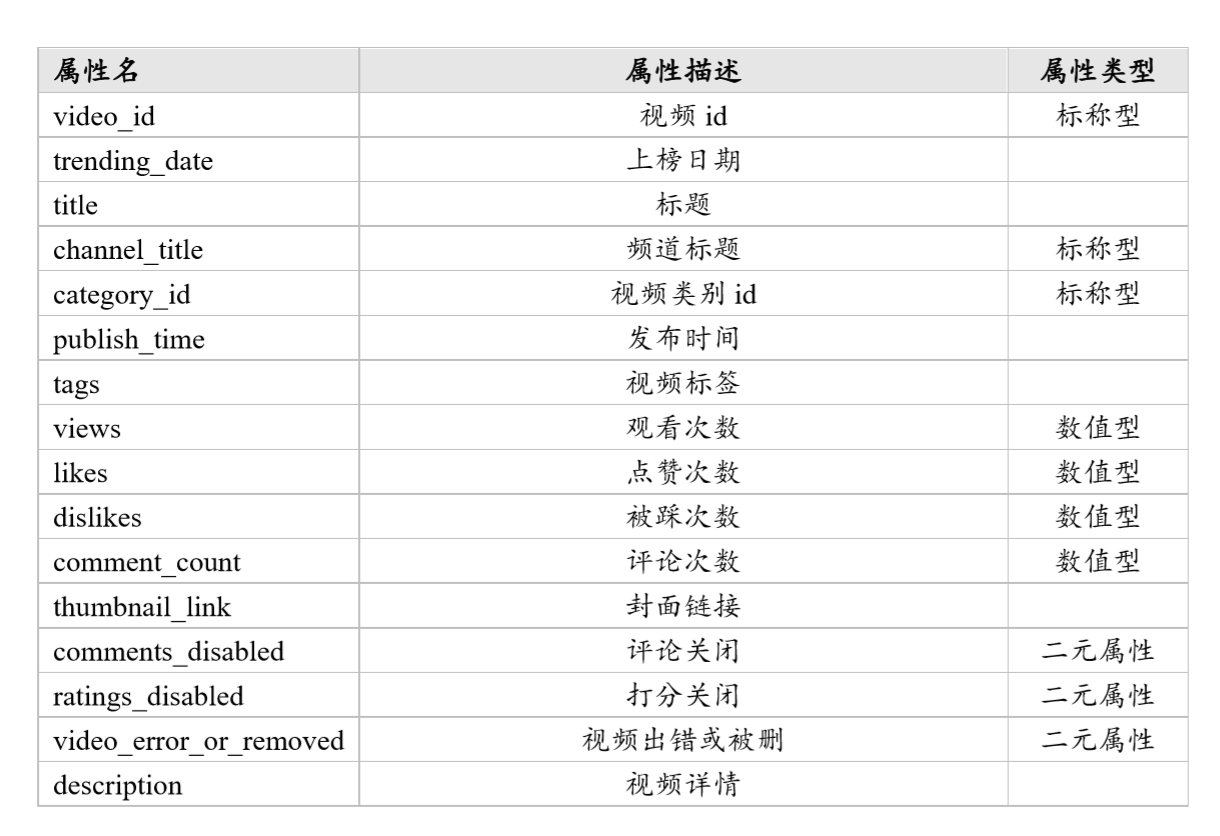

#### 1.1.1标称属性
统计标称属性的各类别的频数。这里着重选取了主要属性的主要类别（频数top15以及top10）。

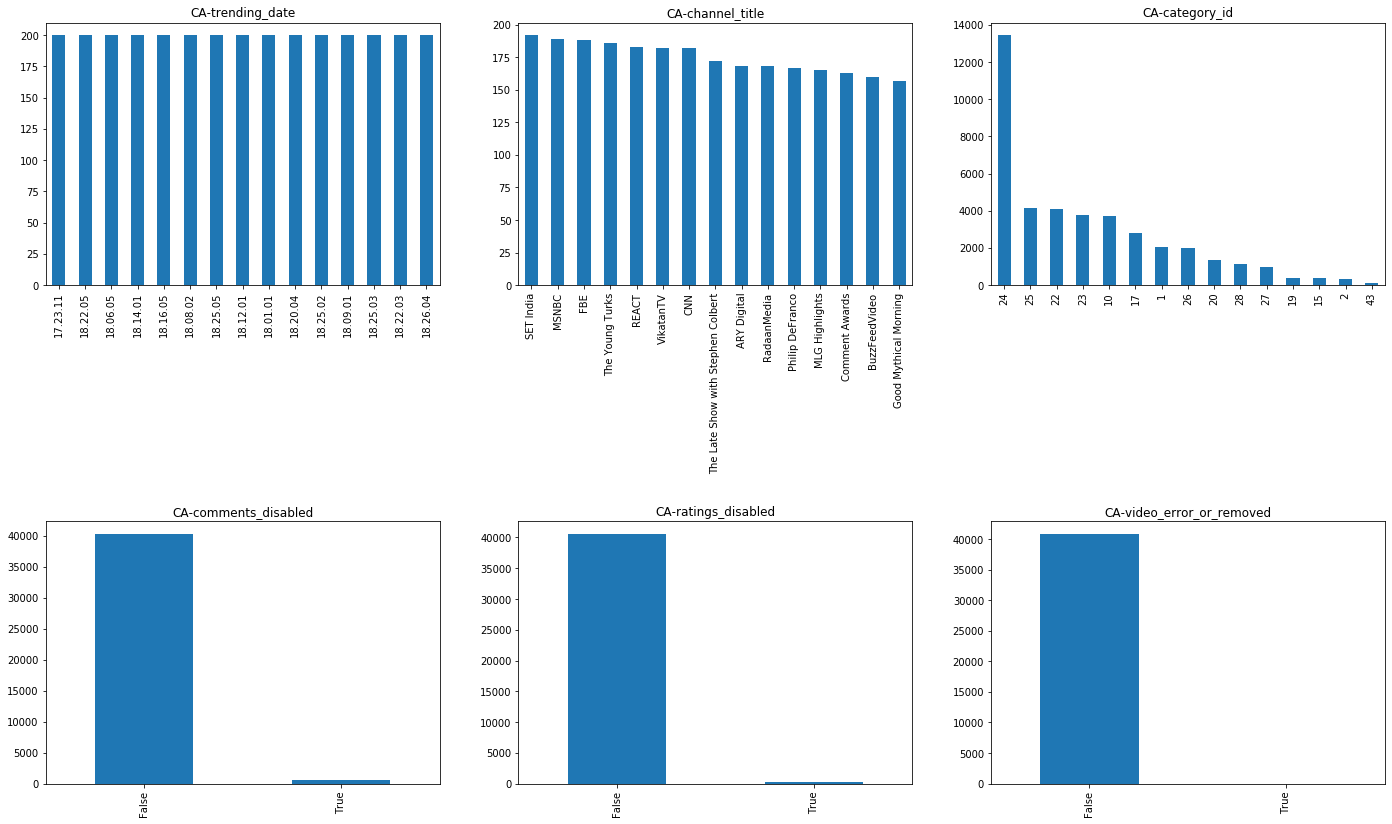

In [6]:
#绘制标称属性的频数分布柱状图
plt.figure(figsize=(24,14))
plt.subplots_adjust(hspace=0.9)

plt.subplot(2,3,1)
plt.title('CA-trending_date')
CA['trending_date'].value_counts().head(15).plot.bar() 

plt.subplot(2,3,2)
plt.title('CA-channel_title')
CA['channel_title'].value_counts().head(15).plot.bar()

plt.subplot(2,3,3)
plt.title('CA-category_id')
CA['category_id'].value_counts().head(15).plot.bar()

plt.subplot(2,3,4)
plt.title('CA-comments_disabled')
CA['comments_disabled'].value_counts().head(15).plot.bar()

plt.subplot(2,3,5)
plt.title('CA-ratings_disabled')
CA['ratings_disabled'].value_counts().head(15).plot.bar()

plt.subplot(2,3,6)
plt.title('CA-video_error_or_removed')
CA['video_error_or_removed'].value_counts().head(15).plot.bar()

In [7]:
#统计标称属性每个类别的具体频数，取top10
CA['channel_title'].value_counts().head(10)

SET India                             192
MSNBC                                 189
FBE                                   188
The Young Turks                       186
REACT                                 183
VikatanTV                             182
CNN                                   182
The Late Show with Stephen Colbert    172
ARY Digital                           168
RadaanMedia                           168
Name: channel_title, dtype: int64

In [8]:
CA['category_id'].value_counts().head(10)

24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
Name: category_id, dtype: int64

In [9]:
CA['comments_disabled'].value_counts().head(10)

False    40298
True       583
Name: comments_disabled, dtype: int64

In [10]:
CA['ratings_disabled'].value_counts().head(10)

False    40602
True       279
Name: ratings_disabled, dtype: int64

In [11]:
CA['video_error_or_removed'].value_counts().head(10)

False    40854
True        27
Name: video_error_or_removed, dtype: int64

#### 1.1.2数值属性
给出五数概括及缺失值的个数

In [41]:
#五数概括
CA.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [42]:
#统计缺失值个数
CA.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

### 1.2数据可视化

#### 1.2.1直方图

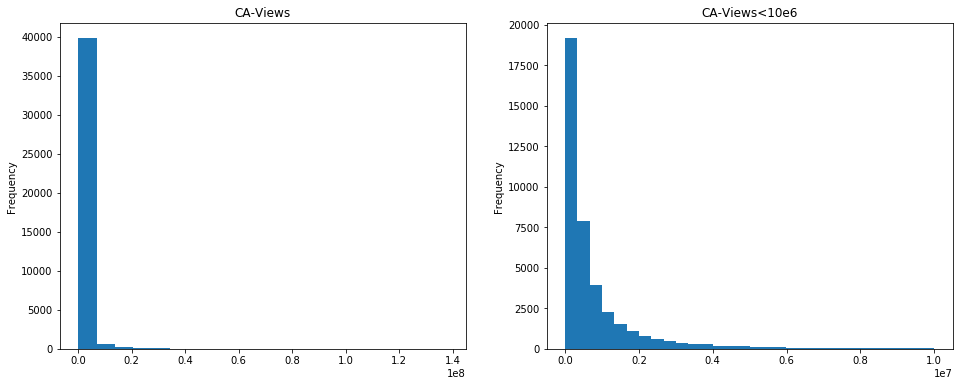

In [24]:
#绘制views直方图
plt.figure(figsize=(16,6))
plt.subplot(121)
CA['views'].plot(kind='hist', title='CA-Views', bins=20)

plt.subplot(122)
CA[CA['views'] < 1e+7]['views'].plot(kind='hist', title='CA-Views<10e6', bins=30)

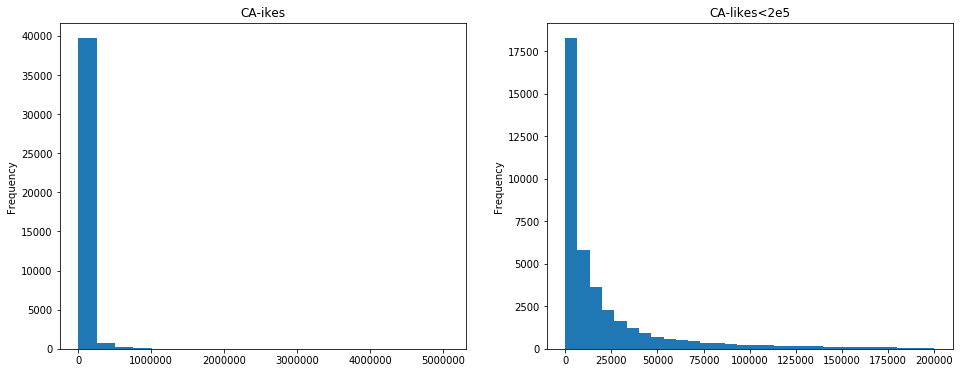

In [27]:
#绘制likes直方图
plt.figure(figsize=(16,6))
plt.subplot(121)
CA['likes'].plot(kind='hist', title='CA-ikes', bins=20)

plt.subplot(122)
CA[CA['likes'] < 2e+5]['likes'].plot(kind='hist', title='CA-likes<2e5', bins=30)

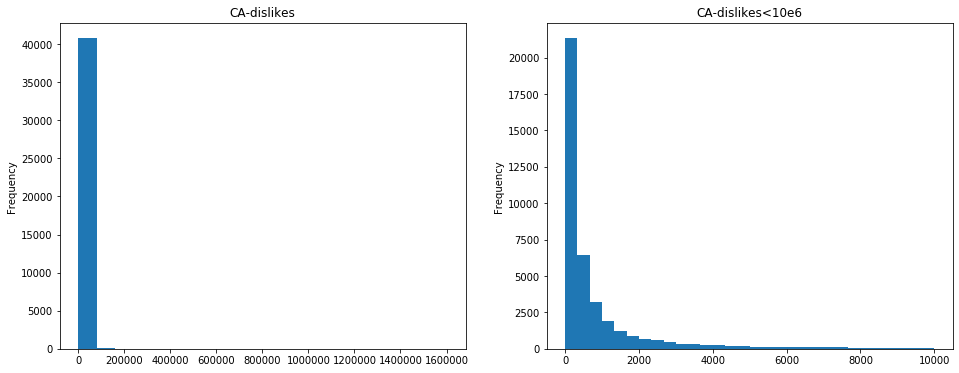

In [30]:
#绘制dislikes直方图
plt.figure(figsize=(16,6))
plt.subplot(121)
CA['dislikes'].plot(kind='hist', title='CA-dislikes', bins=20)

plt.subplot(122)
CA[CA['dislikes'] < 1e+4]['dislikes'].plot(kind='hist', title='CA-dislikes<10000', bins=30)

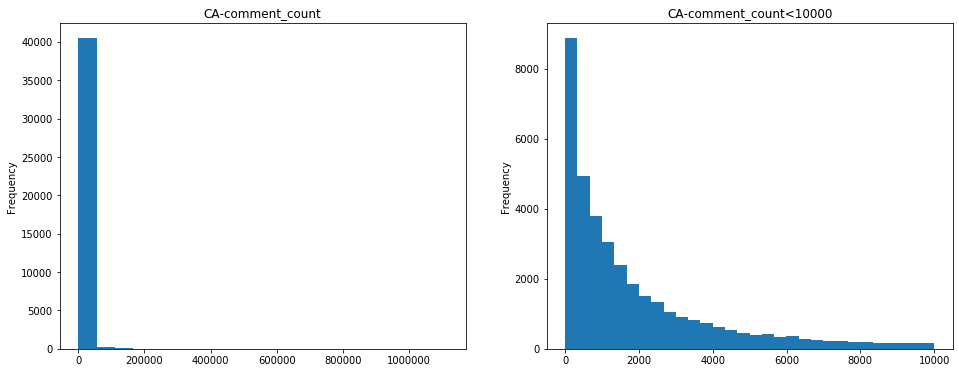

In [33]:
#绘制comment_count直方图
plt.figure(figsize=(16,6))
plt.subplot(121)
CA['comment_count'].plot(kind='hist', title='CA-comment_count', bins=20)

plt.subplot(122)
CA[CA['comment_count'] < 1e+4]['comment_count'].plot(kind='hist', title='CA-comment_count<10000', bins=30)

#### 1.2.2盒图

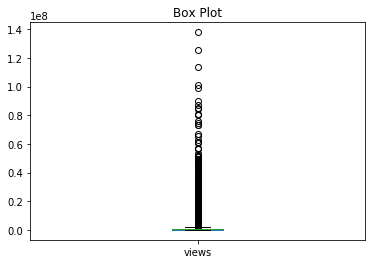

In [34]:
#绘制views盒图
CA['views'].plot(kind='box', title='Box Plot')

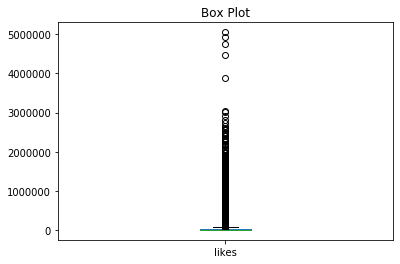

In [35]:
#绘制likes盒图
CA['likes'].plot(kind='box', title='Box Plot')

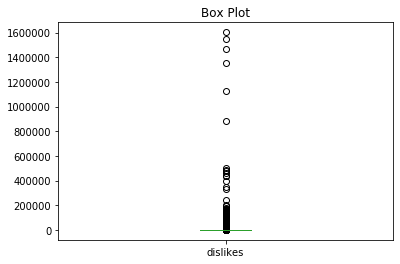

In [36]:
#绘制dislikes盒图
CA['dislikes'].plot(kind='box', title='Box Plot')

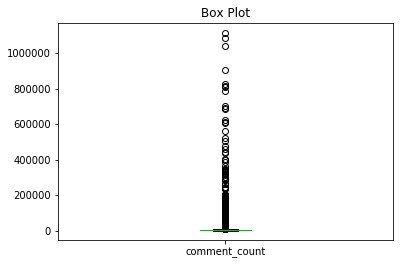

In [37]:
#绘制comment_count盒图
CA['comment_count'].plot(kind='box', title='Box Plot')

观察直方图和盒图，可见Youtube流行视频数据集中的浏览数、点赞数、被踩数及评论数的分布范围非常广，但都有大量的离群点。

## 2.数据缺失的处理

In [38]:
#统计各属性的缺失值个数
CA.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

In [56]:
#查看description列为NaN的数据
CA[pd.isnull(CA.description)].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
98,lHcXhBojpeQ,17.14.11,三屆TVB視帝，拋棄10年青梅竹馬髮妻，為娶小三還不惜與母絕交！,明星百曉生,22,2017-11-12T12:49:50.000Z,[none],88061,47,58,17,https://i.ytimg.com/vi/lHcXhBojpeQ/default.jpg,False,False,False,NaN
115,_QHEPUKBn9g,17.14.11,‘Too Alabama for Alabama’: SNL brutally mocks ...,MAXI POWER,23,2017-11-12T05:01:18.000Z,[none],20163,44,34,8,https://i.ytimg.com/vi/_QHEPUKBn9g/default.jpg,False,False,False,NaN
128,JdHovvb0KD4,17.14.11,Pres. Trump: Putin's Denials Of Interference I...,The View,25,2017-11-13T16:10:21.000Z,"donald trump|""vladimir putin""|""the view""|""hot ...",72253,1217,146,569,https://i.ytimg.com/vi/JdHovvb0KD4/default.jpg,False,False,False,NaN
165,OA0vhAKUD0g,17.14.11,Outlander S03E09 i'm melting with you'',Ella bell,1,2017-11-12T22:33:48.000Z,[none],32941,149,2,5,https://i.ytimg.com/vi/OA0vhAKUD0g/default.jpg,False,False,False,NaN
179,psDauoxUj9A,17.14.11,شاهد انبهار الاعلام المصري بتأهل المغرب لكأس ...,Info Press,17,2017-11-11T22:04:37.000Z,[none],624328,7100,398,971,https://i.ytimg.com/vi/psDauoxUj9A/default.jpg,False,False,False,NaN


观察数据缺失情况，分析缺失原因：

数据集中只有description属性有缺失值，其余的关键属性没有缺失。结合常识分析，视频详情并不是视频发布时的必选项，所以会导致description这一列存在缺失。

### 2.1将缺失部分剔除

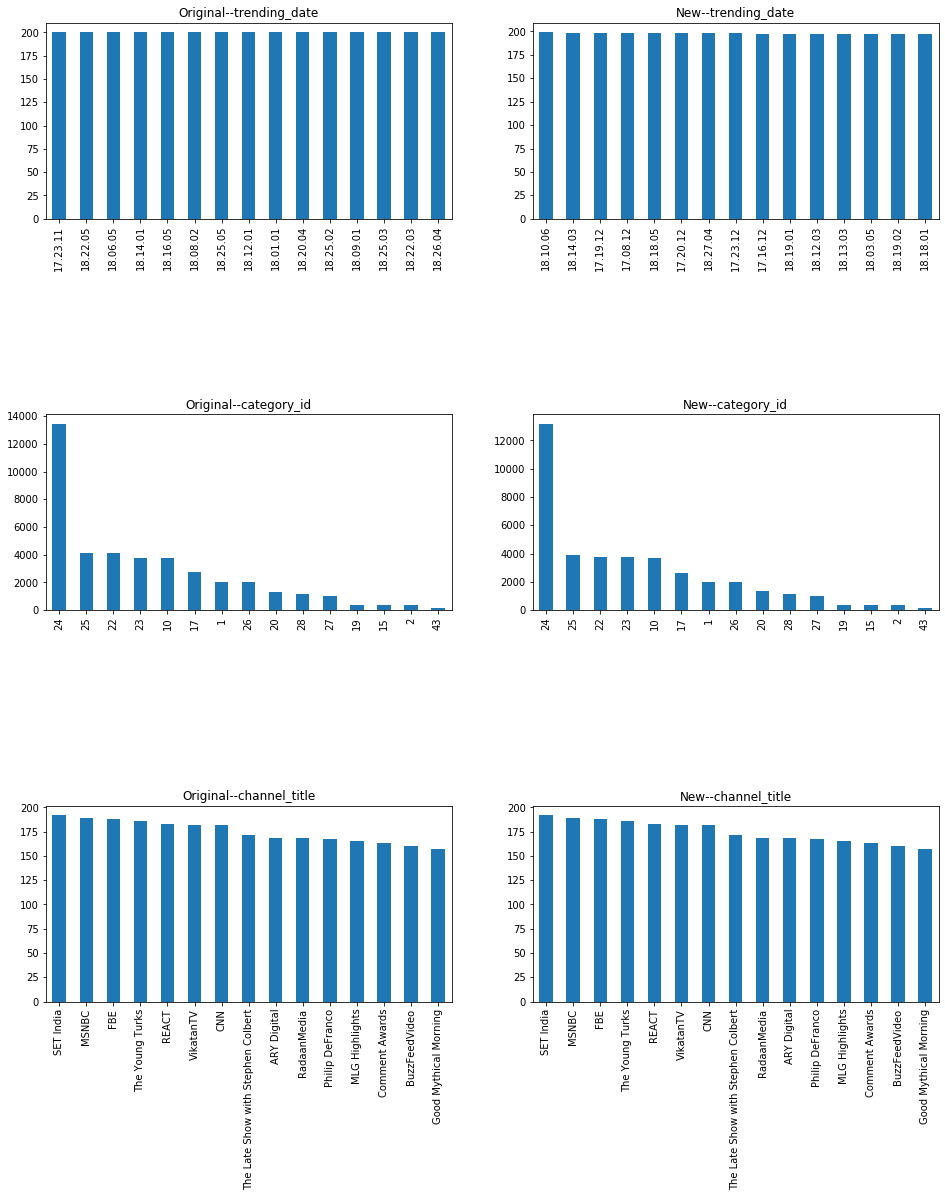

In [51]:
#删除含有空值的行
dropped = CA.dropna()

#可视化对比新旧数据集
plt.figure(figsize=(16,18))
plt.subplots_adjust(hspace=1)

plt.subplot(3,2,5)
plt.title('Original--channel_title')
CA['channel_title'].value_counts().head(15).plot.bar() 

plt.subplot(3,2,6)
plt.title('New--channel_title')
dropped['channel_title'].value_counts().head(15).plot.bar()

plt.subplot(3,2,3)
plt.title('Original--category_id')
CA['category_id'].value_counts().head(15).plot.bar()

plt.subplot(3,2,4)
plt.title('New--category_id')
dropped['category_id'].value_counts().head(15).plot.bar()

plt.subplot(3,2,1)
plt.title('Original--trending_date')
CA['trending_date'].value_counts().head(15).plot.bar()

plt.subplot(3,2,2)
plt.title('New--trending_date')
dropped['trending_date'].value_counts().head(15).plot.bar()

删掉description为NaN的数据行，原数据集各个属性的值浮动较小，变化不明显。

### 2.2用最高频率值填补缺失值

In [53]:
#查看众数
CA.description.mode()

0    Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
dtype: object

In [54]:
#用最高频率值（众数）填补缺失值
replaced = CA.fillna(CA.mode().iloc[0])

用description列中的最高频率值，这种方法对原数据集的改动不大，因为其余各列都没有缺失值，且description的重要性不大。

### 2.3根据属性的相关关系填补缺失值

In [43]:
#计算相关系数
CA.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.139610,-0.144363,-0.028731,-0.068848,0.038741,0.018377,-0.030002
views,-0.139610,1.000000,0.828964,0.557621,0.693107,0.004424,0.005745,0.001928
likes,-0.144363,0.828964,1.000000,0.460427,0.836585,-0.023057,-0.024729,0.001953
dislikes,-0.028731,0.557621,0.460427,1.000000,0.643494,-0.005282,-0.008762,0.000636
comment_count,-0.068848,0.693107,0.836585,0.643494,1.000000,-0.028109,-0.016602,0.003117
comments_disabled,0.038741,0.004424,-0.023057,-0.005282,-0.028109,1.000000,0.147903,-0.003092
ratings_disabled,0.018377,0.005745,-0.024729,-0.008762,-0.016602,0.147903,1.000000,-0.002131
video_error_or_removed,-0.030002,0.001928,0.001953,0.000636,0.003117,-0.003092,-0.002131,1.000000


计算数值属性之间的相关系数，可以分析得出点赞次数与观看次数、评论次数有着较强的相关性等结论，但对填补description的缺失值没有太大用处。

In [66]:
CA[['title', 'channel_title', 'tags', 'thumbnail_link', 'description']].head(10)

,title,channel_title,tags,thumbnail_link,description
0,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,Eminem's new track Walk on Water ft. Beyoncé i...
1,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,STill got a lot of packages. Probably will las...
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,I Dare You: GOING BALD!?,nigahiga,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...
4,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
5,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,► Follow for News! - https://twitter.com/KEEMS...
6,Vanoss Superhero School - New Students,VanossGaming,"Funny Moments|""Montage video games""|""gaming""|""...",https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,Vanoss Merch Shop: https://vanoss.3blackdot.co...
7,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...
8,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,Join the movement. Be a Maverick ► https://Sho...
9,Finally Sheldon is winning an argument about t...,Sheikh Musa,"God|""Sheldon Cooper""|""Young Sheldon""",https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,Sheldon is roasting pastor of the church\nyoun...


筛选出主观上认为与description比较相关的属性，如title、channel_title、tags、thumbnail_link，观察可以发现：

channel_title和tags中的关键词经常会出现在description中，其中tags包含的信息更多，channel信息较单一；

thumbnail_link中的链接与description中的值似乎没有太大关系；

title属性值与description的值偶尔也会有相似之处。

In [65]:
#用tags填补相应description中的缺失值
tag_replaced = CA.copy()
tag_replaced.loc[tag_replaced.description.isnull(),'description'] = tag_replaced[tag_replaced.description.isnull()]['tags']

tag_replaced.description.isnull().sum()

0